# This is a poc on using tensorflow to perform basic classification as referenced from the TensorFlow Forum

In [1]:
import tensorflow as tf
from tensorflow import keras

/Users/joby/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.9.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step

In [8]:
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [53]:
# To plot pretty figures

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [41]:
def plot_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.gca().grid(False)
    plt.xlabel(class_names[train_labels[0]])

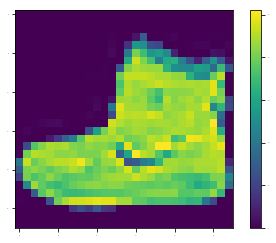

In [33]:
plot_image(train_images[0])

<b> The images are classified into different categories and they are represented by unique numbers from 0-9

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Preprocessing

In [ ]:
train_images = train_images / 255
test_images = test_images / 255


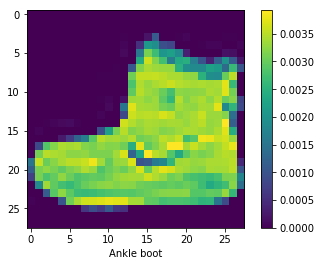

In [54]:
plot_image(train_images[0])

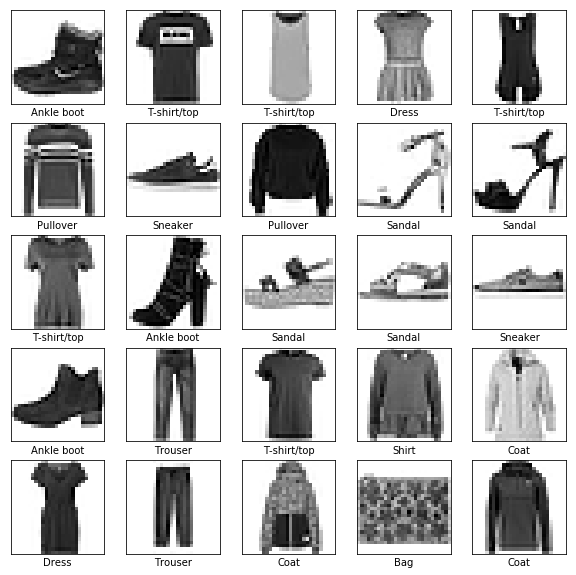

In [59]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('on')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Build Data Model

In [83]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [84]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training the Model

In [85]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 2.3027 - acc: 0.0998

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.1


# Predictions

In [87]:
predictions = model.predict(test_images)

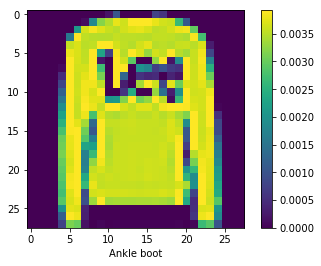

In [73]:
plot_image(test_images[1])

In [75]:
class_names[np.argmax(predictions[1])]

'Pullover'

In [77]:
class_names[test_labels[1]]

'Pullover'

# Testing Model Accuracy

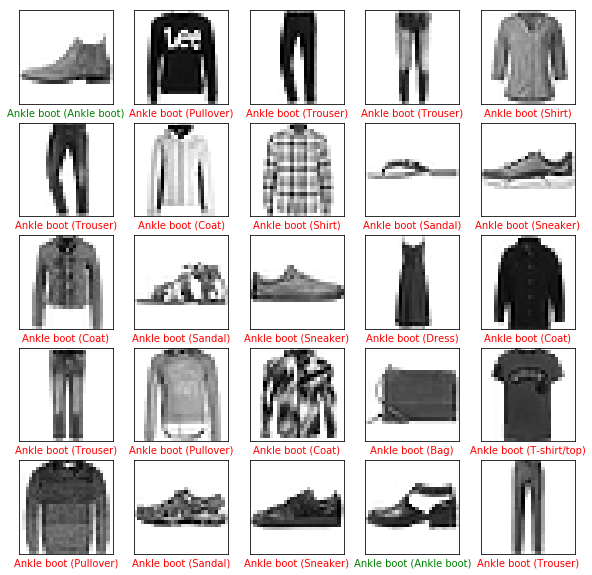

In [88]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('on')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    prediction_label = np.argmax(predictions[i])
    true_label=test_labels[i]
    if prediction_label == true_label:
        color = 'green'
    else:
        color = 'red' 
        
    plt.xlabel("{} ({})".format(class_names[prediction_label], 
                                  class_names[true_label]),
                                  color=color)